# Lab Segmentation 2

In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Experiment 1:  
In this experiment, we are going to implement a histogram automatic 
thresholding technique. Slightly different from the technique explained in the 
lectures.  
You are required to implement a function getThreshold: that takes an image and 
calculates the grey-level threshold according to the following algorithm.

Pixels with grey-level less than threshold will be equal to pure black and 
otherwise pixels will be equal to white (0 and 255 for unit8).  
Conduct your experiments on “cameraman.png”, “cufe.png” ,”book1.png”and 
“book.png”.

1-  Convert the image to Unit8. Hint: multiply the matrix by 255 and then use 
astype(‘uint8’). 
2-  Get counts array that contains the number of pixels in each grey-level.Hint:use your 
previously implemented function that calculated histogram. 
3-  Get initial threshold by getting the average mean of the pixels’ grey-level:  
a.  Tinit = 𝑟𝑜𝑢𝑛𝑑((∑𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝐺𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑠Per𝑘=0𝑔𝑟𝑒𝑦𝐿𝑒𝑣𝑒𝑙𝑘 ∗ 
𝑁𝑢𝑚𝑏𝑒𝑟𝑂𝑓𝑃𝑖𝑥𝑒𝑙𝑠𝑘) / 𝑡𝑜𝑡𝑎𝑙 𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑖𝑥𝑒𝑙𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑖𝑚𝑎𝑔𝑒. )    
→ Hint: you can get total number of pixel by using the cumulative sum and 
find last element of it.   
→Hint to get the last element of a vector, use the index -1 like M[-1].  
4-  Get the two weighted averages (means), one for the lower pixels (have gray level 
less than Tinit) and the other for the higher pixels (have gray level more than Tinit).  
→Hint: use the same method you got the Tinit to calculate the mean, just change the 
gray levels range you are working on.  
Hint: example to get the range from 0:9 → L=list(range(0,10)) 
5-  Update the New threshold to be the average of the two means.  
6-  Repeat the same steps [4:5] until threshold saturates.  

In [5]:
def getThreshold(img):
    img = (img.copy()*255).astype(np.uint8)
    hist = histogram(img, nbins=256)
    Tint = round(sum(hist[1][:]*hist[0][:])/(img.shape[0]*img.shape[1]))
    
    while(True):
        lowerMean = round(sum(hist[1][hist[1]<Tint]*hist[0][hist[1]<Tint])/(sum(hist[0][hist[1]<Tint])))
        higherMean = round(sum(hist[1][hist[1]>=Tint]*hist[0][hist[1]>=Tint])/(sum(hist[0][hist[1]>=Tint]))) 
        
        Tnew = round((lowerMean+higherMean)/2)
        
        if(Tint==Tnew):
            break
        
        Tint = Tnew
        
    return Tint
    

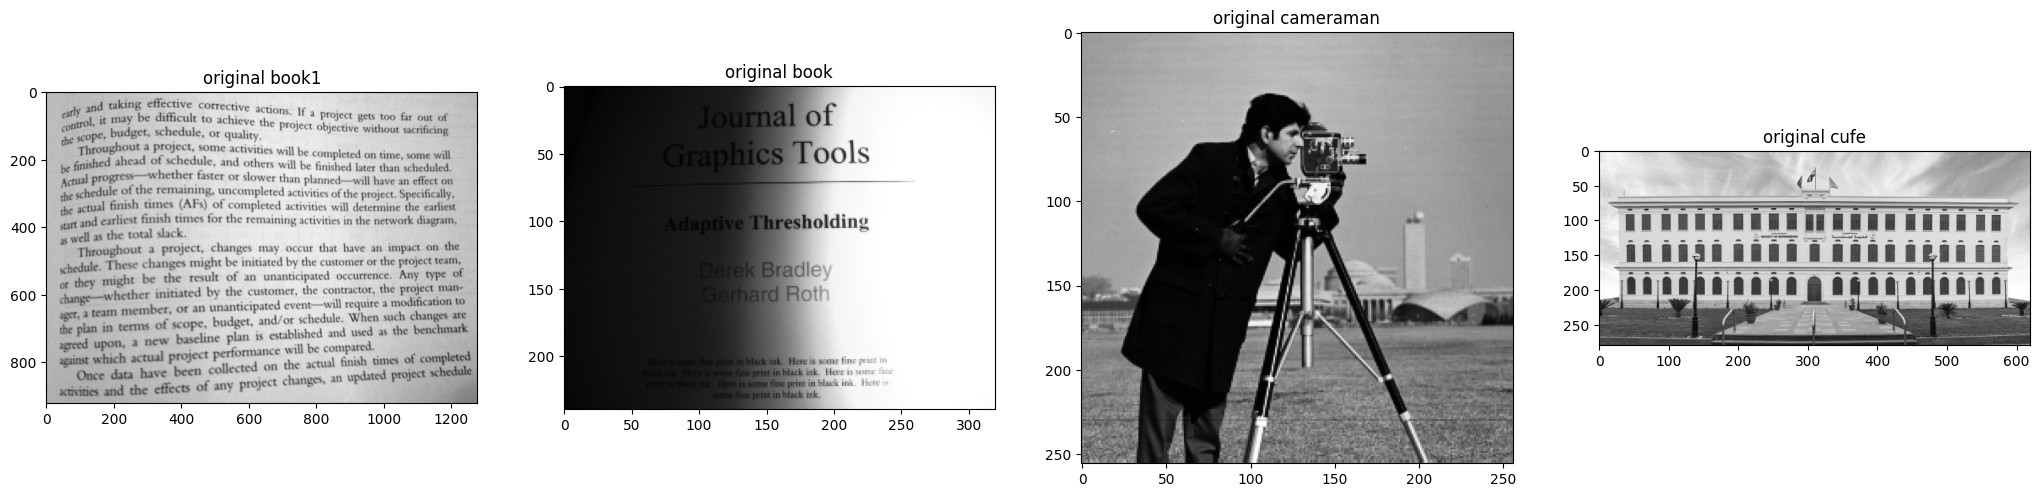

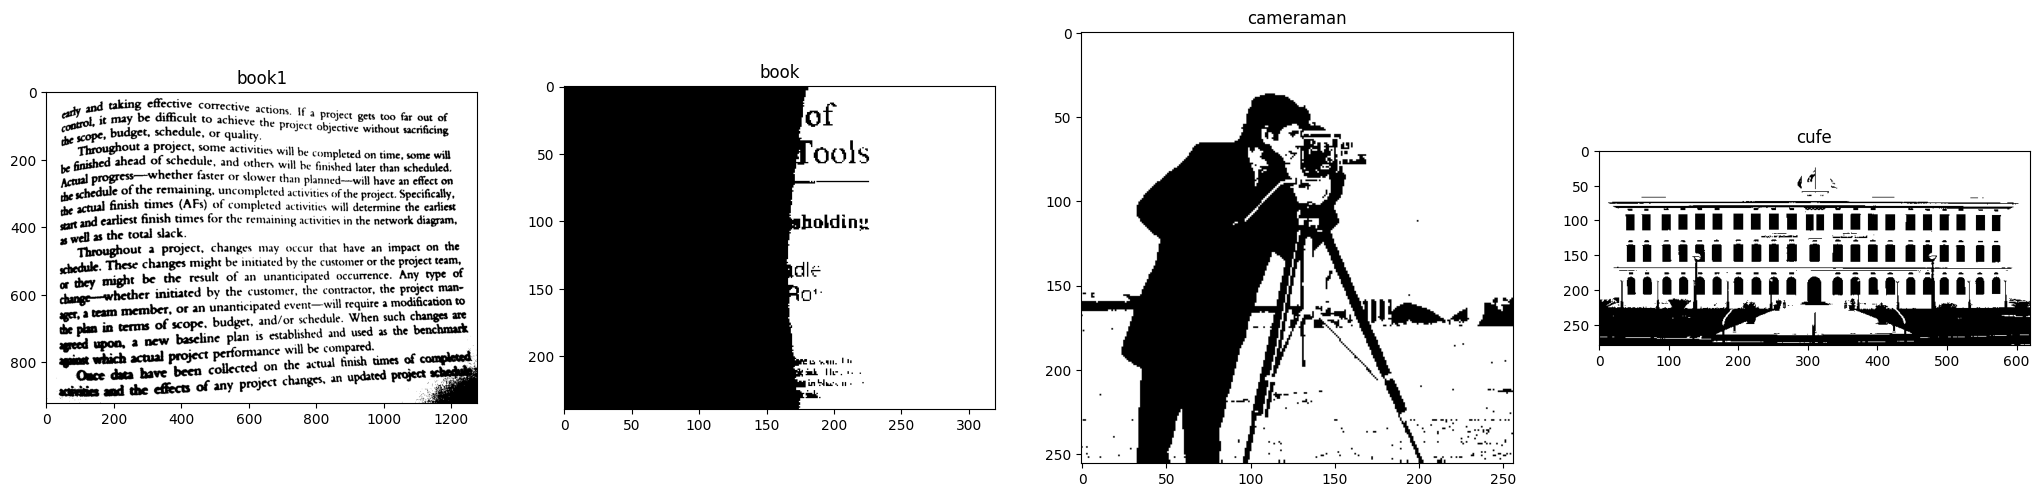

In [9]:
book1 = rgb2gray(io.imread("book1.png"))
thres_book1 = getThreshold(book1)/255
book1_mask = np.ones(book1.shape, dtype=np.float64)
book1_mask[book1<thres_book1]=0

book = io.imread("book.png")/255
thres_book = getThreshold(book)/255
book_mask = np.ones(book.shape, dtype=np.float64)
book_mask[book<thres_book]=0

cameraman = io.imread("cameraman.png")/255
thres_cameraman = getThreshold(cameraman)/255
cameraman_mask = np.ones(cameraman.shape, dtype=np.float64)
cameraman_mask[cameraman<thres_cameraman]=0

cufe = rgb2gray(io.imread("cufe.png"))
thres_cufe = getThreshold(cufe)/255
cufe_mask = np.ones(cufe.shape, dtype=np.float64)
cufe_mask[cufe<thres_cufe]=0

show_images([book1, book, cameraman, cufe],
            ["original book1", "original book", "original cameraman", "original cufe"])

show_images([book1_mask, book_mask, cameraman_mask, cufe_mask],
            ["book1", "book", "cameraman", "cufe"])

# Experiment 2  
Local adaptive thresholding technique applies the adaptive thresholding 
technique on sub parts of the image to find different local thresholds rather than 
one global threshold, which may in some images achieve better results.   
You are required to partition the image “book.png” to four quarters, apply the 
adaptive threshold you have implemented in experiment 1 on each quarter alone, 
and then gather the four quarters together again.  
For this exercise show   
1. The original image.  
2. The image after applying global threshold to it.   
3. The whole image after applying local thresholds to it.   

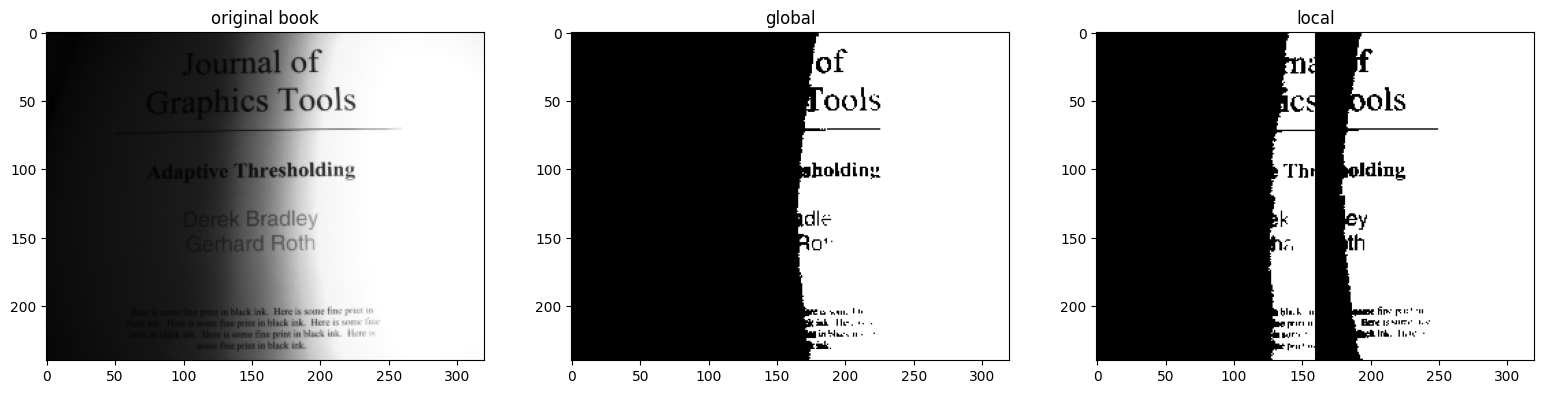

In [14]:
book = io.imread("book.png")/255
thres_book = getThreshold(book)/255
book_Gmask = np.ones(book.shape, dtype=np.float64)
book_Gmask[book<thres_book]=0

img_partition = []
for subarr in np.split(book, 2, axis=0):
    img_partition.extend(np.split(subarr, 2, axis=1))
    
book_TL, book_TR, book_BL, book_BR = img_partition

thres_book_TL = getThreshold(book_TL)/255
book_TL_mask = np.ones(book_TL.shape, dtype=np.float64)
book_TL_mask[book_TL<thres_book_TL] = 0

thres_book_TR = getThreshold(book_TR)/255
book_TR_mask = np.ones(book_TR.shape, dtype=np.float64)
book_TR_mask[book_TR<thres_book_TR] = 0

thres_book_BL = getThreshold(book_BL)/255
book_BL_mask = np.ones(book_BL.shape, dtype=np.float64)
book_BL_mask[book_BL<thres_book_BL] = 0

thres_book_BR = getThreshold(book_BR)/255
book_BR_mask = np.ones(book_BR.shape, dtype=np.float64)
book_BR_mask[book_BR<thres_book_BR] = 0

book_Tmask = np.append(book_TL_mask, book_TR_mask, axis=1)
book_Bmask = np.append(book_BL_mask, book_BR_mask, axis=1)

book_Lmask = np.append(book_Tmask, book_Bmask, axis=0)

show_images([book, book_Gmask, book_Lmask],
            ["original book", "global mask", "local mask"])

# Experiment 3 (Bonus): 
Improve the output more. [Justify your choice] 

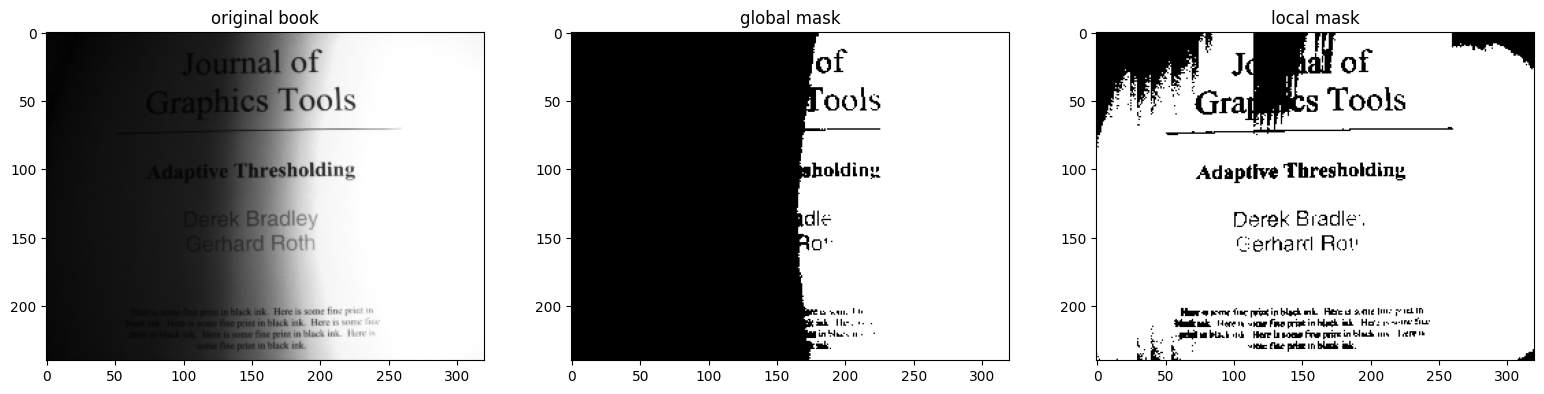

In [17]:
book = io.imread("book.png")/255

thres_book = getThreshold(book)/255
img_book_Gmask = np.ones(book.shape, dtype=np.float64)
img_book_Gmask[book<thres_book] = 0

slices = 64
split = np.split(book, slices, axis=1)
split_mask = np.array([])
for slice in split:
    thres_slice = getThreshold(slice)/255
    slice_mask = np.ones(slice.shape, dtype=np.float64)
    slice_mask[slice<thres_slice] = 0

    if len(split_mask) == 0:
        split_mask = slice_mask
    else:
        split_mask = np.concatenate((split_mask, slice_mask), axis=1)

show_images([book, book_Gmask, split_mask],
            ["original book", "global mask", "local mask"])

## justification
